# Tensorflow Basic Classification using Fashion MNIST dataset from Keras

### Step 1: Import Packages

#### Tensorflow, Keras, Numpy, Matplotlib

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#### plot_image() plots images with acuracy of the model

In [25]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i],true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    plt.show()

#### plot_value_array() plots a graph showing prediction values of the image

In [3]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    plt.show()

### Step 2: Import the Fashion MNIST dataset

#### Split data into train and test data

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Displays number of datas, image height and width

In [5]:
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


#### Displays image of a data

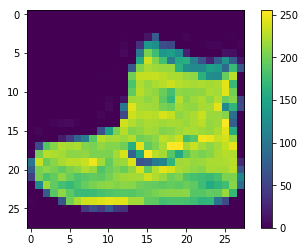

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Step 3: Preprocess the data

#### Scale data between 0 and 1

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### Displays 25 scaled images

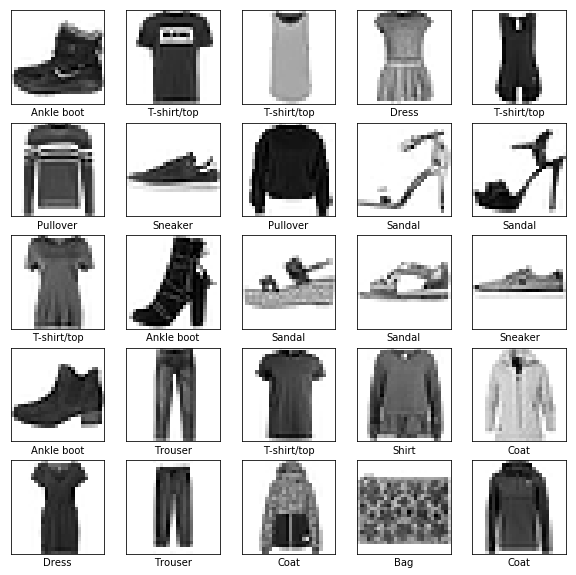

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Step 4: Build the model

#### Convert 2D data into 1D data and setup Sequential Neural Network with 2 dense layers

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#### Compile the model

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Train the model

In [11]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.5011 - acc: 0.8224
Epoch 2/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.3768 - acc: 0.8630
Epoch 3/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.3383 - acc: 0.8772
Epoch 4/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.3136 - acc: 0.8842
Epoch 5/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.2957 - acc: 0.8911


#### Evaluate accuracy

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 38us/step
Test accuracy:  0.8801


### Step 5: Make Predictions

#### Predict the label of a image

In [13]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]), test_labels[0])

[2.4102645e-05 6.6302637e-06 2.6358368e-05 2.7295988e-07 1.6824146e-05
 6.7697670e-03 2.0867569e-04 5.2711315e-02 1.4608201e-04 9.4008994e-01]
9 9


#### Visualize predictions of a image

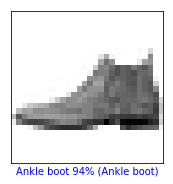

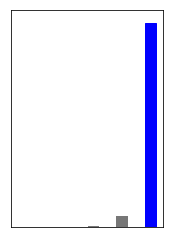

In [14]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

#### Plot the first X test images, their predicted label, and the true label

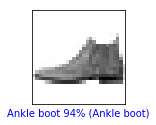

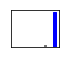

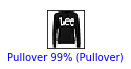

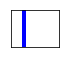

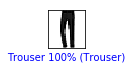

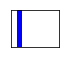

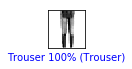

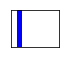

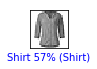

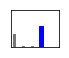

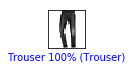

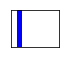

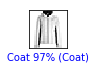

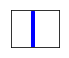

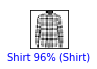

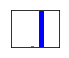

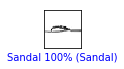

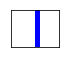

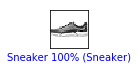

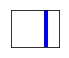

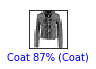

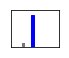

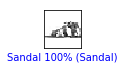

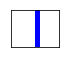

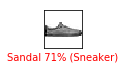

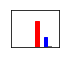

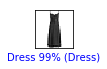

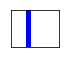

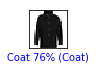

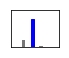

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

#### Make predictions for a single image

(28, 28)
(1, 28, 28)
[[2.4102645e-05 6.6302637e-06 2.6358393e-05 2.7295988e-07 1.6824160e-05
  6.7697605e-03 2.0867569e-04 5.2711315e-02 1.4608201e-04 9.4008994e-01]]


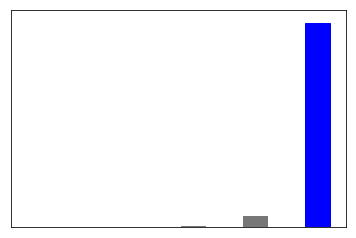

9


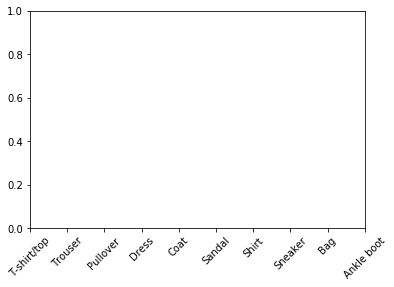

In [29]:
img = test_images[0]
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
print(np.argmax(predictions_single[0]))